# **2. Linear Regression** 
----------
**✔Classification:**    
- 분류. Class가 있다   

**✔Regression:**   
- Class로 나누어져 있지 않다

**Linear Regression?**   
직선, 즉 1차함수의 개념인 y= ax+b 직선을 임의로 그려넣고, 그 직선을 바탕으로 예측하는 모델을 말함.   
👉 학습 data와 가장 잘 맞는 직선을 찾는 일

❓ 잠깐, 근데 왜 하필 이름이 회귀에요?    
아버지와 아들의 키를 비교해 본 결과, 자라날 수록 각각의 세대의 키의 평균과 가까운 키가 되더라   
→ 세대를 거듭할 수록 평균에 가까워 진다   
→ 결국 평균으로 돌아 오는거야   
→ 회귀하는 구나!   

공부시간 - 성적의 상관관계를 나타내는 예제 data를 Linear Regression으로 학습해보자.

In [14]:
import torch
from torch import optim

#Data Definition
#x는 input, y는 output
x_train = torch.FloatTensor([[1],[2],[3]]) #(3,1)
y_train = torch.FloatTensor([[2],[4],[6]])

#Hypothesis
#y = Wx + b
#W: Weight, 기울기
#b: bias, 점 이동

#W, b를 0으로 초기화 => 항상 출력 0을 예측
W = torch.zeros(1, requires_grad = True) #requires_grad: 미분 할 거야 말 거야
b = torch.zeros(1, requires_grad = True) #True면 ㅎ..할게 학습...(기울기 계산 하겠다는 뜻)
hypothesis = W * x_train + b

#Compute Loss(=Cost)
#Mean Squared Error(MSE)를 사용합니다
#회귀 용도의 딥러닝 모델을 훈련시킬 때 많이 사용되는 손실함수.
#(예측값 - 정답)²의 평균을 내는 방식
#예측값 - 정답 = Error

#Error 값을 왜 제곱해요?
#1. 보기 쉽다.                        2. 수학적으로, Error 발생 시 제곱하면 값이 증폭되어 큰 값, 작은 값 비교가 쉽다.
#3. 역전파에서 계산이 용이하다
#Error값의 제곱을 Square error라고 한다 => Error 값을 제곱해서 넓이로 보겠다
cost = torch.mean((hypothesis - y_train)**2)

#Gradient desent
#torch.optim 라이브러리 사용
#역전파 단계에서 수집된 기울기 값으로 매개변수 조정
optimizer = optim.SGD([W, b], lr=0.01) # Gradient를 줄이는 방향으로 계속계속 이동할게요

optimizer.zero_grad()#매개변수의 gradient값 초기화(값이 accumulate됨)
                     #gradient값이 accumulate되는 이유
                     #1. Accumulating Gradients:
                         #When you accumulate gradients over multiple mini-batches,
                         #you sum the gradients for each parameter across these batches.
                     #2. Updating Parameters: 
                        #After accumulating gradients, you update the model parameters using an optimizer.
                        #The optimizer is responsible for scaling the gradients appropriately
                        #based on the batch size and performs the parameter update.
cost.backward() #예측 손실(Prediction Loss)을 역전파, 각 매개변수에 대한 손실 변화도를 계산
optimizer.step() #Gradient 계산 뒤 optimizer.step 호출, 역전파에서 수집된 기울기 값으로 매개변수 조정

# 3. Deeper Look at Gradient Descent
-----------
**Stochastic Gradient Descent?**     
확률적 경사 하강. 미분으로 기울기(W)를 구한 다음, 기울기가 낮은 쪽으로 Update 하는 Stochastic한 최적화 함수.    

**❓ Stochastic?**   
전체를 한 번에 계산하지 않고, 확률적으로 일부 샘플을 구해서 조금씩 나눠 계산하겠다   
👉 계산 비용 절감, but 수렴 속도 느림

**[backward 단계]**    
- 곡선을 내려가자! 기울기가 클 수록 더 멀리! => Gradient를 계산하자
- MSE(Loss)값을 W에 대해 편미분해서 기울기 계산, 역전파 시켜 각 매개변수에 대해 Gradient를 계산.

**[optim.step() 단계]**   
- W = W - α∇W로 매개변수 조정    

Gradient Descent를 더 잘 이해하기 위해, Simpler Hypothesis Function과 Dummy Data와 함께합니다.

## Full Code using Gradient Descent with torch.optim

In [15]:
#x_train과 y_train의 모양이 같다
#H(x) = x, W = 1일 때 가장 정확한 모델
#W != 1이면 W가 1에 최대한 가깝게 학습시키는 게 목표!
import torch

x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])

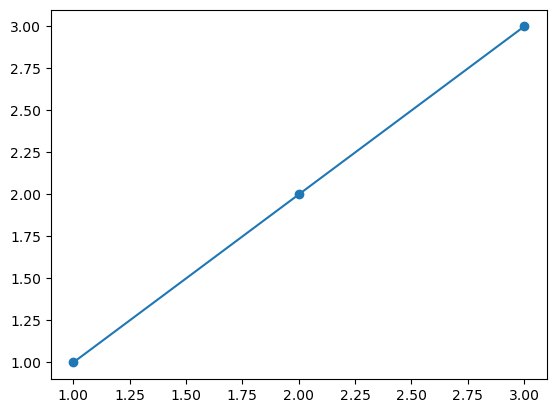

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Data
plt.scatter(x_train, y_train)
# Best-fit line
xs = np.linspace(1, 3, 1000)
plt.plot(xs, xs)

In [17]:
#H(x) = Wx라고 하자
W = torch.zeros(1, requires_grad = True)

optimizer = torch.optim.SGD([W], lr=0.15)

for epoch in range(11):
    hypothesis = W * x_train
    
    cost=torch.mean((hypothesis - y_train)**2)
    
    print("Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}".format(epoch, '10', W.item(), cost.item()))
    
    optimizer.zero_grad()
    cost.backward() #Cost Function 미분, 각 변수에 gradient 채움. 해당 scalar에 대한 미분 값을 역전파
    optimizer.step() #저장된 gradient 값으로 gradient descent 계산

Epoch    0/10 W: 0.000, Cost: 4.666667
Epoch    1/10 W: 1.400, Cost: 0.746667
Epoch    2/10 W: 0.840, Cost: 0.119467
Epoch    3/10 W: 1.064, Cost: 0.019115
Epoch    4/10 W: 0.974, Cost: 0.003058
Epoch    5/10 W: 1.010, Cost: 0.000489
Epoch    6/10 W: 0.996, Cost: 0.000078
Epoch    7/10 W: 1.002, Cost: 0.000013
Epoch    8/10 W: 0.999, Cost: 0.000002
Epoch    9/10 W: 1.000, Cost: 0.000000
Epoch   10/10 W: 1.000, Cost: 0.000000


# 4. Multivatie Linear Regression
---------
$$ H(x_1, x_2, x_3) = x_1w_1 + x_2w_2 + x_3w_3 + b $$
$$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2 $$

여러개의 정보로 부터 하나의 값을 도출해내는!   
대부분의 경우 복잡한 data가 input으로 들어가겠죵?   

3번의 쪽지 시험에서 받은 점수로, 기말고사 점수를 예측하는 모델을 만들어 봅시다

In [18]:
#Data
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]]) #(5,3)
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]]) #(5,1)

#만약 입력 변수(x)가 3개라면, weight도 3개!
#H(x) = w1x1 + w2x2 + w3x3 + b
#물론 이걸 하나하나 코드로 짜도 되지만.. 만약 입력 변수가 1000개라면? 벌써 괴롭죠?
#행렬곱(matmul())로 한 번에 계산하면 더 간결하고, 속도도 더 빠르고, x의 길이가 바뀌어도 코드를 안 바꿔도 된다!

W = torch.zeros((3,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)
optimizer = optim.SGD([W, b], lr = 1e-5) 

for epoch in range(21):
    hypothesis = x_train.matmul(W) + b
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    print('Epoch: {:4d}/{} hypothesis: {}, Cost: {:.6f}'.format(epoch, 20, hypothesis.squeeze().detach(), cost.item()))
     #detach(): 현재 Tensor 객체와 동일한 data를 가지지만, 연산 그래프에서 분리된 새로운 Tensor 객체를 생성합니다.
     #         1. 새 Tensor를 만들어서 추가적인 계산을 하고 싶다
     #         2. 연산 그래프와의 의존성을 제거하고 메모리 사용량과 속도를 높이고 싶다.
     #         3. Gradient 계산에 사용되지 않으며, 중간 출력 값을 얻을 때 유용하다
    

Epoch:    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]), Cost: 29661.800781
Epoch:    1/20 hypothesis: tensor([67.2578, 80.8397, 79.6523, 86.7394, 61.6605]), Cost: 9298.520508
Epoch:    2/20 hypothesis: tensor([104.9128, 126.0990, 124.2466, 135.3015,  96.1821]), Cost: 2915.712402
Epoch:    3/20 hypothesis: tensor([125.9942, 151.4381, 149.2133, 162.4896, 115.5097]), Cost: 915.040527
Epoch:    4/20 hypothesis: tensor([137.7968, 165.6247, 163.1911, 177.7112, 126.3307]), Cost: 287.936005
Epoch:    5/20 hypothesis: tensor([144.4044, 173.5674, 171.0168, 186.2332, 132.3891]), Cost: 91.371010
Epoch:    6/20 hypothesis: tensor([148.1035, 178.0144, 175.3980, 191.0042, 135.7812]), Cost: 29.758139
Epoch:    7/20 hypothesis: tensor([150.1744, 180.5042, 177.8508, 193.6753, 137.6805]), Cost: 10.445305
Epoch:    8/20 hypothesis: tensor([151.3336, 181.8983, 179.2240, 195.1707, 138.7440]), Cost: 4.391228
Epoch:    9/20 hypothesis: tensor([151.9824, 182.6789, 179.9928, 196.0079, 139.3396]), Cost: 2.49313

## Full Code with torch.nn

In [19]:
import torch.nn as nn
import torch.nn.functional as F

class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self): #W, b를 정의한다
        super().__init__();
        self.linear = nn.Linear(3, 1) #input 차원 3, output차원 1(단일 값을 얻을 거임)
    
    def forward(self, x):# H(x) 계산(순전파)
        return self.linear(x)
    
#Data
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]]) #(5,3)
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]]) #(5,1)

model = MultivariateLinearRegressionModel()

optimizer = optim.SGD(model.parameters(), lr = 1e-5) #model.parameters()가 바뀐 부분!

for epoch in range(1,21):
    hypothesis = model(x_train)
    cost = F.mse_loss(hypothesis, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    print('Epoch: {:4d}/{} hypothesis: {}, Cost: {:.6f}'.format(epoch, 20, hypothesis.squeeze().detach(), cost.item()))

Epoch:    1/20 hypothesis: tensor([7.0703, 8.8745, 8.6643, 8.2653, 7.7878]), Cost: 26927.587891
Epoch:    2/20 hypothesis: tensor([71.1543, 85.8993, 84.5579, 90.9116, 66.5384]), Cost: 8440.841797
Epoch:    3/20 hypothesis: tensor([107.0325, 129.0227, 127.0478, 137.1821,  99.4308]), Cost: 2646.228760
Epoch:    4/20 hypothesis: tensor([127.1193, 153.1660, 150.8364, 163.0873, 117.8462]), Cost: 829.925476
Epoch:    5/20 hypothesis: tensor([138.3650, 166.6830, 164.1546, 177.5906, 128.1564]), Cost: 260.610718
Epoch:    6/20 hypothesis: tensor([144.6609, 174.2508, 171.6110, 185.7104, 133.9288]), Cost: 82.160400
Epoch:    7/20 hypothesis: tensor([148.1857, 178.4878, 175.7856, 190.2564, 137.1606]), Cost: 26.225424
Epoch:    8/20 hypothesis: tensor([150.1590, 180.8600, 178.1227, 192.8016, 138.9702]), Cost: 8.692624
Epoch:    9/20 hypothesis: tensor([151.2636, 182.1882, 179.4311, 194.2264, 139.9833]), Cost: 3.196959
Epoch:   10/20 hypothesis: tensor([151.8819, 182.9319, 180.1636, 195.0241, 140.55

## 5. Loading Data 
지금까지 예시로 적은 양의 데이터를 다뤄봤지만, 솔직히.. 현실에서는 훨씬 복잡하고 많은 데이터들이 있잖아요?     
데이터가 많을수록 더 정교한 모델 학습이 가능하지만,   
이걸 한 번에 학습시키기는.. 쉽지 않다    
1. 너무 느림
2. 하드웨어적으로 불가능
그렇다면, 전체 데이터를 균일하게 쪼개서 쪼갠 덩어리 단위로 나눠서 학습하면 어떨까?   
👉 Minibatch Gradient Descent

**장점:**   
- 업데이트를 좀 더 빠르게 할 수 있다   

**단점:**    
- 전체 데이터를 쓰는게 아니라서 잘못된 방향으로 없데이트 할 수 있다(거칠게 cost값이 줄어듦!)

In [20]:
#Dataset
import torch
import torch.nn as nn
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[73, 80, 75],
                       [93, 88, 93],
                       [89, 91, 90],
                       [96, 98, 100],
                       [73, 66, 70]]
        self.y_data = [[152],[185],[180],[196],[142]]

    def __len__(self):
        return len(self.x_data) #이 데이터 셋의 총 데이터 수

    def __getitem__(self, idx): #어떤 인텍스를 받으면, 이에 상응하는 입출력 데이터로 반환
        x = torch.FloatTensor(self.x_data)
        y = torch.FloatTensor(self.y_data)

        return x, y

dataset = CustomDataset()

In [24]:
#DataLoader
from torch.utils.data import DataLoader

dataloader = DataLoader(
    dataset,
    batch_size=2, #각 미니배치의 크기. 통상적으로 2의 제곱수로 설정(16, 32, 64,...)
    shuffle=True #Epoch마다 데이터셋을 섞어서, 데이터가 학습되는 순서를 바꿈. True로 하는 것을 권장!!!!
)

In [28]:
nb_epoches = 20
for epoch in range(nb_epoches+1):
    for batch_idx, samples in enumerate(dataloader): #enumerate(dataloader): minibatch 인덱스와 데이터를 받음
        x_train, y_train = samples

        #H(x)계산
        prediction = model(x_train)

        #cost 계산
        cost = F.mse_loss(prediction, y_train)

        #cost로 H(x) 개선
        optimizer.zero_grad
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(epoch, nb_epoches, batch_idx+1, len(dataloader), cost.item()))

Epoch    0/20 Batch 1/3 Cost: 0.683425
Epoch    0/20 Batch 2/3 Cost: 0.682359
Epoch    0/20 Batch 3/3 Cost: 0.681049
Epoch    1/20 Batch 1/3 Cost: 0.679458
Epoch    1/20 Batch 2/3 Cost: 0.677617
Epoch    1/20 Batch 3/3 Cost: 0.675510
Epoch    2/20 Batch 1/3 Cost: 0.673173
Epoch    2/20 Batch 2/3 Cost: 0.670549
Epoch    2/20 Batch 3/3 Cost: 0.667697
Epoch    3/20 Batch 1/3 Cost: 0.664591
Epoch    3/20 Batch 2/3 Cost: 0.661255
Epoch    3/20 Batch 3/3 Cost: 0.657653
Epoch    4/20 Batch 1/3 Cost: 0.653832
Epoch    4/20 Batch 2/3 Cost: 0.649772
Epoch    4/20 Batch 3/3 Cost: 0.645503
Epoch    5/20 Batch 1/3 Cost: 0.640987
Epoch    5/20 Batch 2/3 Cost: 0.636260
Epoch    5/20 Batch 3/3 Cost: 0.631322
Epoch    6/20 Batch 1/3 Cost: 0.626178
Epoch    6/20 Batch 2/3 Cost: 0.620835
Epoch    6/20 Batch 3/3 Cost: 0.615282
Epoch    7/20 Batch 1/3 Cost: 0.609567
Epoch    7/20 Batch 2/3 Cost: 0.603626
Epoch    7/20 Batch 3/3 Cost: 0.597534
Epoch    8/20 Batch 1/3 Cost: 0.591281
Epoch    8/20 Batch 2/3 C